
**Ujian Tengah Semester Mata Kuliah Analisis Prediktif**
1. Akhmad Reyhan (5211811007)
2. Nadia Pramesti (5211811011)
3. Fany Nur Adetiya (5211811018)


# Load Files & Libraries

In [ ]:
from google.colab import files
files.upload()

Saving metadata.csv to metadata (1).csv
Saving public_test_data.csv to public_test_data.csv
Saving train_data.csv to train_data.csv


{'metadata (1).csv': b'No,Column name,Description\n1,bedrooms,Number of bedrooms\n2,bathrooms,Number of bathrooms\n3,sqft_living,House area\n4,sqft_lot,Total area\n5,floors,Number of floors\n6,waterfront,Next to area of water (1 or 0)\n7,view,View  scale (1 - lowest to 5 \xe2\x80\x93 highest)\n8,condition,Condition scale (1 - lowest to 5 \xe2\x80\x93 highest)\n9,sqft_above,Total area for upper floors\n10,sqft_basement,Total area for basement\n11,yr_built,First build\n12,yr_renovated,Last renovated\n13,street,Street location\n14,city,City location\n15,statezip,Zip\n16,price,Price\n',
 'public_test_data.csv': b'bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,price\n4,2.5,3080,35430,2.0,0,0,3,3080,0,1997,0,9788-16090 NE Quail Creek Dr,Redmond,WA 98053,635000.0\n3,2.5,2570,3600,2.5,0,0,3,2570,0,2007,0,1474-1476 29th Pl NE,Issaquah,WA 98029,680000.0\n3,1.75,1400,6956,1.0,0,0,4,1400,0,1957,2001,10642

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('public_test_data.csv')
meta = pd.read_csv('metadata.csv')

In [ ]:
train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,price
0,3,1.0,1330,15678,1.0,0,0,3,900,430,1984,0,3009 229th Pl NE,Sammamish,WA 98074,405000.000000
1,4,2.5,2700,9320,2.0,0,0,4,2700,0,1994,0,1317 5th Ln,Kirkland,WA 98033,837500.000000
2,2,1.0,790,8424,1.0,0,0,4,790,0,1953,1983,556 N 167th St,Shoreline,WA 98133,268500.000000
3,3,2.5,1800,2700,2.0,0,0,3,1800,0,2011,0,2803 SW Bataan St,Seattle,WA 98126,365000.000000
4,4,2.5,2340,11784,2.0,0,0,3,2340,0,1997,0,24200-24498 144th Ave SE,Kent,WA 98042,330000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,3,1.0,1180,5002,1.5,0,0,3,1180,0,1946,0,17022 5th Ave NE,Shoreline,WA 98155,282508.888889
2940,4,2.0,2520,6000,1.0,0,0,3,1400,1120,1921,2007,6521 Fremont Ave N,Seattle,WA 98103,875000.000000
2941,3,1.0,1150,8145,1.0,0,0,4,990,160,1932,1958,16232 11th Ave NE,Shoreline,WA 98155,290000.000000
2942,2,1.0,910,2002,1.5,0,0,3,910,0,1900,2005,100 20th Ave E,Seattle,WA 98112,600000.000000


In [ ]:
meta

,No,Column name,Description
0,1,bedrooms,Number of bedrooms
1,2,bathrooms,Number of bathrooms
2,3,sqft_living,House area
3,4,sqft_lot,Total area
4,5,floors,Number of floors
5,6,waterfront,Next to area of water (1 or 0)
6,7,view,View scale (1 - lowest to 5 – highest)
7,8,condition,Condition scale (1 - lowest to 5 – highest)
8,9,sqft_above,Total area for upper floors
9,10,sqft_basement,Total area for basement


# 1. Business Understanding

## 1.1 Determine Business Objective

### 1.1.1 Background

Avenir Estate, agen real estate di kota XYZ menghadapi tantangan dalam memberikan estimasi harga rumah yang akurat, terutama karena variabilitas harga yang tinggi dan metode penentuan harga manual yang kurang konsisten. Untuk mengatasi masalah ini, perusahaan mengimplementasikan sistem prediksi harga rumah berbasis machine learning menggunakan data historis seperti luas rumah, jumlah kamar, dan variabel lainnya. Sebelumnya, Avenir Estate telah mencoba beberapa pendekatan untuk memperbaiki akurasi penentuan harga, seperti menggunakan metode penilaian berbasis perbandingan harga properti serupa di wilayah sekitar dan penilaian manual oleh tim ahli. Karena kurang efektif, Avenir Estate akhirnya memutuskan untuk mengembangkan sistem prediksi harga rumah berbasis machine learning yang lebih akurat, otomatis, dan mampu mempertimbangkan banyak faktor sekaligus tanpa mengandalkan penilaian individual.

### 1.1.2 Business Objective

Berdasarkan latar belakang perusahaan, business objective dari Avenir Estate dalam pengembangan sistem prediksi harga rumah berbasis machine learning adalah sebagai berikut:

Meningkatkan akurasi dan konsistensi dalam estimasi harga rumah untuk mempercepat proses penentuan harga, mengurangi ketergantungan pada penilaian manual, dan meningkatkan kepercayaan pelanggan terhadap layanan Avenir Estate. Dengan demikian, perusahaan dapat memperluas pangsa pasar dan meningkatkan keuntungan melalui penyediaan layanan yang lebih efisien, andal, dan berbasis data.



### 1.1.3 Business Success Criteria

Untuk menentukan apakah tujuan bisnis Avenir Estate berhasil atau tidak, berikut adalah kriteria kesuksesan yang spesifik dan dapat diukur:
1. Mengurangi waktu estimasi harga rumah sebesar 50-70% melalui otomatisasi.
2. Meningkatkan akurasi prediksi harga hingga 85-95% dibandingkan metode manual atau berbasis perbandingan.
3. Meningkatkan tingkat konversi pelanggan potensial menjadi penjual/beli rumah aktif sebesar 10% melalui kepercayaan pada estimasi harga yang lebih akurat.


## 1.2 Assess Situation

### 1.2.1 Inventory of Resources

Berikut adalah inventaris sumber daya yang dapat mendukung proyek pengembangan sistem prediksi harga rumah berbasis machine learning:

**Daftar Hardware**
1. Komputer Desktop dan Laptop untuk Tim Pengembangan
    * Spesifikasi: 8-16 GB RAM, prosesor Intel i7 atau AMD Ryzen 7, GPU (jika memungkinkan untuk mempercepat proses training model).

    * Jumlah: 3 unit untuk tim data scientist, 2 unit untuk tim software engineer, dan 2 unit untuk data engineer.
2. Server Internal
    * Spesifikasi: Server dengan kapasitas RAM minimal 128 GB, penyimpanan SSD 1 TB, dan prosesor multi-core yang kuat.
3. Storage Devices
    * Spesifikasi: NAS (Network Attached Storage) atau perangkat penyimpanan eksternal dengan kapasitas minimal 4 TB.

****
**Sumber Data dan Pengetahuan**
1. Data Historis Avenir Estate di Kota XYZ
    * Konten: Dataset lengkap dengan informasi properti, seperti luas rumah, jumlah kamar, jumlah kamar mandi, usia bangunan, harga rumah, dan lain-lain.
    * Sumber: Data historis properti yang dimiliki perusahaan dalam 5 tahun terakhir.

****
**Sumber Daya Manusia**
1. Data Scientist
    * Jumlah: 3 orang
    * Keahlian: Machine learning, analisis data, pemodelan statistik, dan pengembangan model prediksi.
2. Data Engineer
    * Jumlah: 2 orang
    * Keahlian: Pengelolaan data, pengembangan pipeline data, dan pengetahuan tentang sistem database (SQL, NoSQL).
3. Software Engineer
    * Jumlah: 3 orang
    * Keahlian: Pengembangan perangkat lunak, pemrograman (Python, JavaScript), dan pengalaman dalam penerapan model machine learning ke dalam aplikasi.
4. Tim Ahli Properti
    * Jumlah: 2-3 orang
    * Keahlian: Pemahaman tentang pasar properti lokal, tren harga, dan faktor yang mempengaruhi harga rumah.
5. Analis Bisnis
    * Jumlah: 1-2 orang
    * Keahlian: Menyusun persyaratan bisnis, analisis kebutuhan proyek, dan dokumentasi proyek.

****
**Sumber Dana**
1. Anggaran Pengembangan SDM: IDR 100 juta untuk pelatihan khusus bagi tim, terutama dalam bidang machine learning dan integrasi sistem.
2. Biaya Operasional Proyek: IDR 150 juta untuk biaya listrik, server maintenance, perangkat penyimpanan tambahan, dan kebutuhan lainnya.



### 1.2.2 Requirements, Assumptions, and Constraints

**Requirements (Kebutuhan)**
1. Kebutuhan Teknis
    * Model Prediksi Harga Rumah: Model machine learning yang mampu memperkirakan harga properti berdasarkan variabel seperti luas rumah, jumlah kamar, lokasi, dan faktor lainnya.
    * Infrastruktur Komputasi: Hardware (server, komputer) atau cloud services untuk training dan evaluasi model.
    * Penyimpanan Data yang Aman: Database terpusat yang dapat menyimpan data properti, baik data historis maupun hasil prediksi, dengan tingkat keamanan yang memadai.
2. Kebutuhan Data
    * Data Properti Historis: Dataset yang mencakup variabel-variabel properti seperti luas tanah, jumlah kamar, lokasi, dan harga jual.
    * Data Validasi: Dataset terpisah untuk menguji dan memvalidasi model prediksi agar hasilnya dapat diandalkan.
3. Kebutuhan Sumber Daya
    * Tenaga Ahli: Tim data scientist, data engineer, software engineer, serta ahli properti untuk memberikan insight dan validasi model.
    * Dana: Anggaran yang cukup untuk mendukung pengembangan, pengujian, dan implementasi sistem prediksi.
    * Waktu: Timeline proyek yang terukur dan dapat dikelola untuk menyelesaikan setiap tahap proyek, mulai dari pengumpulan data hingga implementasi dan evaluasi.
****
**Assumptions (Asumsi)**
1. Kualitas dan Ketersediaan Data
    * Ketersediaan Data: Data historis properti tersedia secara lengkap dan dapat diakses tanpa kendala.
    * Akurasi Data: Data transaksi harga properti yang ada dianggap akurat dan mewakili kondisi pasar saat ini.
2. Stabilitas Faktor Eksternal
    * Kondisi Pasar Properti: Kondisi ekonomi dan harga pasar properti di Kota XYZ relatif stabil dalam jangka waktu proyek.
3. Ketersediaan Teknologi dan Infrastruktur
    * Hardware dan layanan cloud tetap tersedia tanpa perubahan besar dalam biaya atau kebijakan penggunaan.
4. Dukungan Penuh dari Tim dan Manajemen
    * Komitmen Manajemen: Manajemen perusahaan mendukung penuh proyek ini dan bersedia memberikan dana, sumber daya, dan waktu yang dibutuhkan.
    * Keterlibatan Tim Ahli: Tim ahli properti akan terlibat dalam proses evaluasi dan validasi hasil model secara berkala.
5. Kemampuan Model dalam Prediksi
    * Model Machine Learning: Dianggap bahwa algoritma machine learning yang digunakan (misalnya, regresi, random forest, XGBoost) mampu menghasilkan prediksi harga yang akurat jika diberikan data yang relevan.
    * Dukungan Infrastruktur IT: Infrastruktur IT yang ada mampu menangani komputasi yang diperlukan, atau perusahaan siap meningkatkan kapasitas jika dibutuhkan.
****
**Constraints (Batasan)**
1. Batasan Dana
    * Anggaran Terbatas: Dana yang dialokasikan untuk proyek ini terbatas, sehingga perlu optimasi dalam pembelian atau penyewaan hardware, cloud services, serta biaya pelatihan karyawan.
2. Batasan Waktu
    * Timeline Ketat: Waktu proyek terbatas (sekitar 6-8 bulan), sehingga setiap fase harus selesai tepat waktu agar tidak mengganggu fase berikutnya.
    * Maintenance dan Pembaruan: Keterbatasan waktu untuk melakukan maintenance atau pembaruan pada sistem setelah peluncuran awal.
3. Batasan Sumber Daya
    * Jumlah Tenaga Ahli Terbatas: Jumlah data scientist dan data engineer terbatas, sehingga beban kerja harus diatur dengan baik untuk memastikan kelancaran proyek.
    * Keterbatasan Infrastruktur: Keterbatasan server internal dan cloud computing yang dapat digunakan dapat membatasi pemrosesan data atau kecepatan training model.
4. Batasan Data
    * Keterbatasan Data Historis: Data historis mungkin memiliki celah atau data yang hilang, sehingga dapat mempengaruhi akurasi model.



### 1.2.3 Risk and Contingencies

**Risiko Data**
1. Data hilang atau terhapus secara tidak sengaja karena kesalahan manusia atau kerusakan hardware.
  * Rencana Mengatasi: Simpan data secara berkala di cloud dengan mekanisme backup otomatis.
2. Data yang didapatkan kotor atau tidak konsisten
  * Rencana Mengatasi: Menambahkan proses data cleansing untuk mengatasi data duplikat dan data yang hilang, misalnya dengan imputasi rata-rata.
****
**Risiko Model**
1. Model machine learning yang dikembangkan mungkin tidak menghasilkan prediksi yang cukup akurat atau performanya bervariasi.
  * Rencana Mengatasi:
    * Menguji beberapa algoritma machine learning yang berbeda (seperti random forest, XGBoost, neural network) dan pilih yang memberikan akurasi terbaik.
    * Melakukan cross-validation yang lebih ketat serta hyperparameter tuning untuk meningkatkan akurasi model.
    * Membuat model ensemble (gabungan beberapa model) untuk mengurangi risiko ketidakakuratan dari model tunggal.
2. Server atau komputer internal mungkin tidak cukup kuat untuk menangani proses training atau prediksi model dalam skala besar.
  * Rencana Mengatasi: Menyewa layanan cloud (misalnya, AWS atau Google Cloud) untuk menjalankan pemrosesan model yang membutuhkan komputasi berat.
****
**Risiko Sumber Daya Manusia**
1. Tim data scientist atau engineer mungkin tidak memiliki pengalaman yang cukup dalam hal machine learning atau cloud computing.
  * Rencana Mengatasi: Mengadakan pelatihan intensif atau workshop untuk meningkatkan kemampuan teknis dalam machine learning atau infrastruktur cloud.
2. Anggota tim inti (misalnya data scientist utama atau data engineer) keluar dari proyek, yang dapat memperlambat kemajuan.
  * Rencana Mengatasi: Mendokumentasikan setiap langkah proyek secara mendetail agar proses tetap dapat dilanjutkan meskipun ada pergantian tim.
****
**Risiko Biaya dan Waktu**
1. Biaya pengembangan dan pemeliharaan sistem melebihi anggaran awal yang disediakan.
  * Rencana Mengatasi: Melakukan analisis biaya berkala setiap bulan untuk memantau pengeluaran dan mencegah pengeluaran berlebihan.
2. Proyek tidak selesai tepat waktu karena kendala teknis, data, atau tenaga kerja.
  * Rencana Mengatasi: Membuat rencana timeline yang realistis dengan langkah jelas, sehingga setiap keterlambatan bisa segera diidentifikasi dan diatasi.

### 1.2.4 Terminology

1. **Mean Squared Error (MSE)**
  
  MSE adalah metrik untuk mengukur rata-rata kuadrat dari kesalahan (error) antara nilai yang diprediksi oleh model dengan nilai sebenarnya. Dalam proyek ini, MSE digunakan untuk mengevaluasi performa model prediksi harga rumah, dengan nilai MSE yang lebih rendah menandakan model yang lebih akurat.
2. **Exploratory Data Analysis (EDA)**

  Proses awal dalam analisis data di mana pola-pola, distribusi, dan hubungan antar variabel dieksplorasi dan dipahami. EDA membantu mengidentifikasi fitur yang relevan dan memperkirakan potensi performa model.
3. **Feature Engineering**

  Proses mengubah data mentah menjadi variabel (features) yang lebih bermakna dan relevan untuk meningkatkan performa model.
4. **Hyperparameter Tuning**

  Proses pengaturan parameter model untuk meningkatkan performa prediksi. Hyperparameter tuning bertujuan untuk menemukan kombinasi hyperparameter yang memberikan hasil terbaik pada model prediksi harga.
5. **Ensemble Learning**

  Teknik menggabungkan beberapa model untuk membuat prediksi yang lebih akurat dibandingkan prediksi dari satu model saja. Dalam proyek ini, ensemble learning bisa digunakan dengan mengombinasikan beberapa algoritma untuk memperbaiki akurasi prediksi harga.

### 1.2.5 Costs and Benefits

1. Biaya Sewa Server

  Biaya Sewa Server Cloud: Rp 2.000.000 per bulan (opsi standar) atau Rp 5.000.000 per bulan (opsi premium)

  Penjelasan: Server digunakan untuk menyimpan data dan menjalankan model machine learning. Dengan server cloud yang memiliki spesifikasi tinggi, pemrosesan data dan model akan lebih cepat dan lebih efisien.
  
  Manfaat:
  * Semakin baik kapasitas server, semakin cepat dan efisien proses pemodelan, sehingga tim dapat menguji lebih banyak model dalam waktu yang lebih singkat.
  * Waktu pemrosesan yang lebih cepat memungkinkan pengambilan keputusan yang lebih responsif dan prediksi harga rumah yang lebih akurat.
2. Biaya Tenaga Kerja untuk Tim Pengembangan
  
  Gaji Data Scientist dan Data Engineer: Rp 15.000.000 – Rp 25.000.000 per bulan per orang

  Penjelasan: Biaya ini mencakup gaji tim data scientist, data engineer, dan tim IT lainnya yang bekerja dalam pengembangan model prediksi dan manajemen infrastruktur.

  Manfaat:
  * Dengan tim yang kompeten, kualitas pemodelan akan meningkat, menghasilkan model yang lebih akurat dan proses yang lebih efisien.
  * Pengalaman dan keahlian dari tim yang kompeten akan mempersingkat waktu pengembangan dan mengurangi risiko kesalahan dalam model.
3. Biaya Perangkat Lunak dan Tools Data Science

  Biaya Langganan Platform Data Science (contoh: JupyterHub, GitHub Enterprise, DataRobot): Rp 5.000.000 – Rp 10.000.000 per bulan

  Penjelasan: Perangkat lunak dan platform ini membantu dalam pengelolaan proyek machine learning, kolaborasi tim, dan eksperimen data secara terpusat.

  Manfaat:
  * Akses ke platform ini meningkatkan efisiensi kolaborasi antar anggota tim dan memungkinkan pemantauan perkembangan proyek secara real-time.
  * Alat-alat ini mempercepat proses eksplorasi data, eksperimen model, dan pemantauan kinerja model, sehingga tim dapat bekerja lebih produktif.
4. Biaya Backup Data dan Keamanan

  Biaya Backup dan Keamanan Data di Cloud: Rp 2.000.000 per bulan

  Penjelasan: Data backup dan sistem keamanan diperlukan untuk mencegah kehilangan data dan melindungi data dari serangan siber atau akses tidak sah.

  Manfaat:
  * Data yang aman dan terjamin membuat proyek berjalan tanpa gangguan yang disebabkan oleh kehilangan atau kebocoran data.
  * Backup yang teratur memungkinkan pemulihan data dengan cepat, mengurangi risiko kehilangan data penting yang dapat mengganggu kelancaran proyek.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 1.3 Determine Data Science Goals

### 1.3.1 Data Science Goals

Data science goals yang akan dicapai adalah membangun model machine learning yang akurat dan efisien untuk memprediksi harga rumah, guna mendukung pengambilan keputusan bisnis yang tepat dalam penentuan harga rumah.

### 1.3.2 Data Science Success Criteria

Menghasilkan model dengan margin error dibawah 10% untuk menghindari perbedaan nilai prediksi dan aktual yang terlalu besar pada penentuan harga rumah.

## 1.4 Produce Project Plan

### 1.4.1 Project Plan

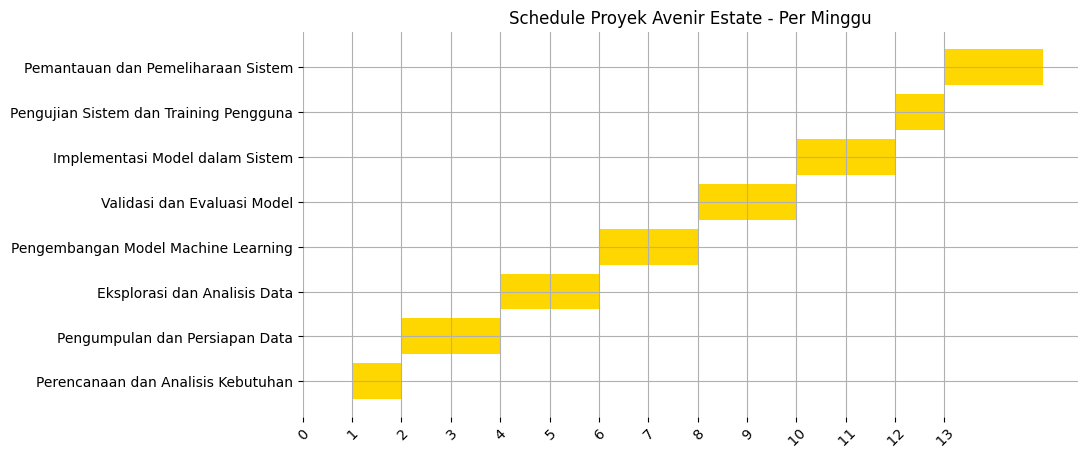

### 1.4.2 Initial Assessment of Tools and Techniques


* Eksplorasi Data: Google Colab dengan Python
* Pengembangan Model:	Google Colab dengan Python (Scikit-Learn, TensorFlow)
* Pemilihan Model Regresi: Regresi Linear dan Ensemble (Random Forest, Gradient Boosting, dan XGBoost)
* Pelaporan: Google Document


# 2. Data Understanding

## 2.1 Collect Initial Data

### 2.1.1 Initial Data Collection Report

## 2.2 Describe Data

memiliki 2944 baris dan 16 kolom

In [ ]:
train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,price
0,3,1.0,1330,15678,1.0,0,0,3,900,430,1984,0,3009 229th Pl NE,Sammamish,WA 98074,405000.000000
1,4,2.5,2700,9320,2.0,0,0,4,2700,0,1994,0,1317 5th Ln,Kirkland,WA 98033,837500.000000
2,2,1.0,790,8424,1.0,0,0,4,790,0,1953,1983,556 N 167th St,Shoreline,WA 98133,268500.000000
3,3,2.5,1800,2700,2.0,0,0,3,1800,0,2011,0,2803 SW Bataan St,Seattle,WA 98126,365000.000000
4,4,2.5,2340,11784,2.0,0,0,3,2340,0,1997,0,24200-24498 144th Ave SE,Kent,WA 98042,330000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,3,1.0,1180,5002,1.5,0,0,3,1180,0,1946,0,17022 5th Ave NE,Shoreline,WA 98155,282508.888889
2940,4,2.0,2520,6000,1.0,0,0,3,1400,1120,1921,2007,6521 Fremont Ave N,Seattle,WA 98103,875000.000000
2941,3,1.0,1150,8145,1.0,0,0,4,990,160,1932,1958,16232 11th Ave NE,Shoreline,WA 98155,290000.000000
2942,2,1.0,910,2002,1.5,0,0,3,910,0,1900,2005,100 20th Ave E,Seattle,WA 98112,600000.000000


informasi untuk setiap tabel

In [ ]:
meta

,No,Column name,Description
0,1,bedrooms,Number of bedrooms
1,2,bathrooms,Number of bathrooms
2,3,sqft_living,House area
3,4,sqft_lot,Total area
4,5,floors,Number of floors
5,6,waterfront,Next to area of water (1 or 0)
6,7,view,View scale (1 - lowest to 5 – highest)
7,8,condition,Condition scale (1 - lowest to 5 – highest)
8,9,sqft_above,Total area for upper floors
9,10,sqft_basement,Total area for basement


## 2.3 EDA

ada 2 info baru : umur rumah sama kategorinya berdasarkan tahun pembuatan

In [ ]:
train['house_age'] = 2024 - train['yr_built']

def categorize_yr_built(year):
  if year <= 1950:
    return 'Tua'
  elif year <= 1997:
    return 'Semi Modern'
  else:
    return 'Modern'


train['house_age_category'] = train['yr_built'].apply(categorize_yr_built)

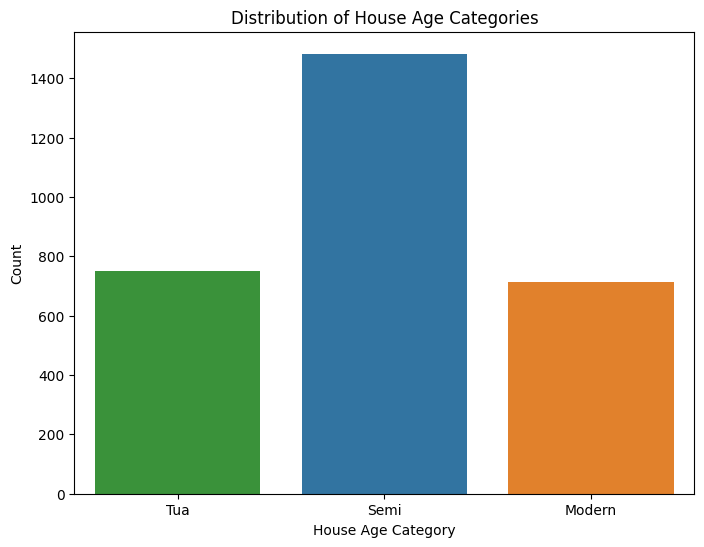

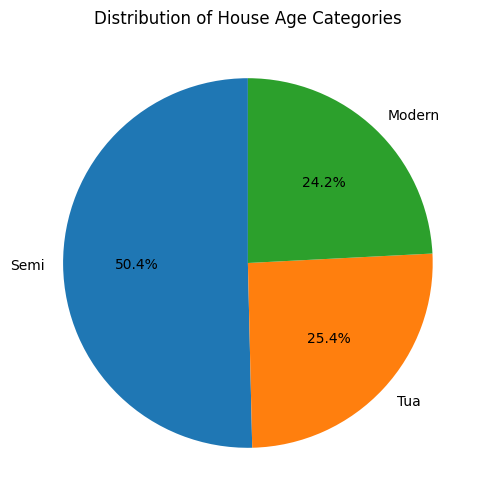

In [ ]:
category_counts = train['house_age_category'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='house_age_category', data=train, hue='house_age_category', order=['Tua','Semi Modern','Modern'])
plt.title('Distribution of House Age Categories')
plt.xlabel('House Age Category')
plt.ylabel('Count')
plt.show()

# Alternatively, you can create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of House Age Categories')
plt.show()

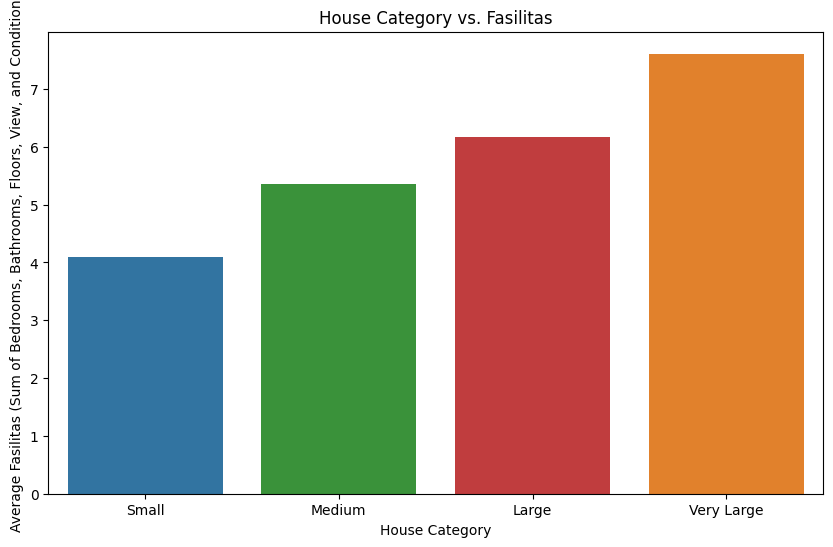

In [ ]:
train['fasilitas'] = train['bedrooms'] + train['bathrooms'] + train['waterfront'] + train['view']
def categorize_sqft_living(area):

  if area <= 1460:
    return 'Small'
  elif area <= 1980:
    return 'Medium'
  elif area <= 2620:
    return 'Large'
  else:
    return 'Very Large'

# Menambahkan kolom kategori
train['house_category'] = train['sqft_living'].apply(categorize_sqft_living)
# Membuat bar plot untuk rata-rata fasilitas per kategori
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='house_category', y='fasilitas', hue='house_category',order=['Small','Medium', 'Large', 'Very Large'],legend=False, errorbar=None)

# Menambahkan judul dan label sumbu
plt.title('House Category vs. Fasilitas')
plt.xlabel('House Category')
plt.ylabel('Average Fasilitas (Sum of Bedrooms, Bathrooms, Floors, View, and Condition)')

# Menampilkan plot
plt.show()

Dari visualisasi diatas, semakin besar ukuran rumah, semakin banyak fasilitas

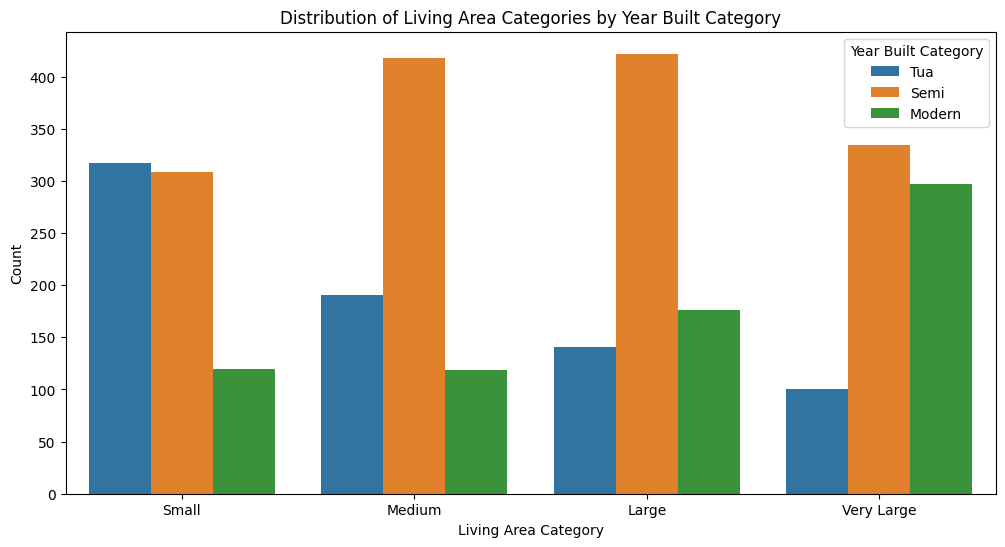

In [ ]:
# Visualisasi category_living dengan category_year
plt.figure(figsize=(12, 6))
sns.countplot(x='house_category', hue='house_age_category', data=train,
              order=['Small', 'Medium', 'Large', 'Very Large'],
              hue_order=['Tua', 'Semi', 'Modern'])
plt.title('Distribution of Living Area Categories by Year Built Category')
plt.xlabel('Living Area Category')
plt.ylabel('Count')
plt.legend(title='Year Built Category')
plt.show()

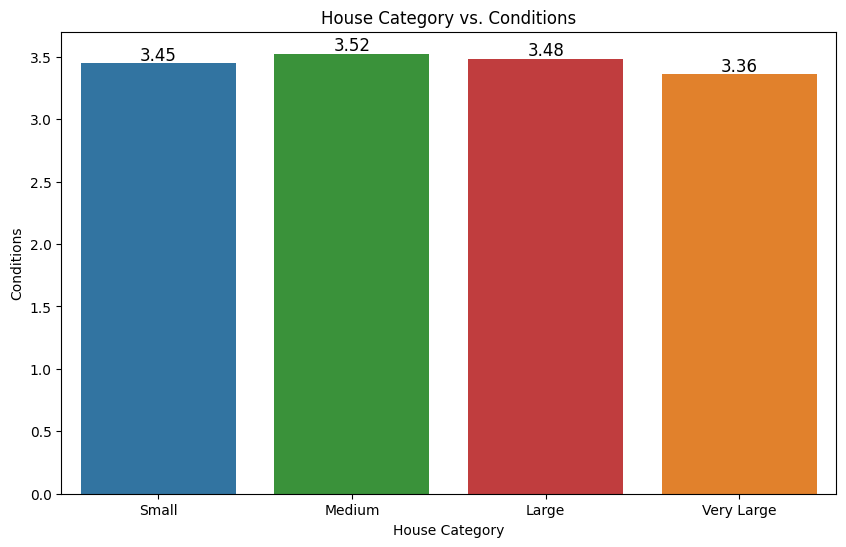

In [ ]:
# Membuat bar plot untuk rata-rata fasilitas per kategori
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=train, x='house_category', y='condition', hue='house_category', order=['Small','Medium', 'Large', 'Very Large'], legend=False, errorbar=None)

# Menambahkan label di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                fontsize=12, color='black',
                xytext=(0, 6),
                textcoords='offset points')

# Menambahkan judul dan label sumbu
plt.title('House Category vs. Conditions')
plt.xlabel('House Category')
plt.ylabel('Conditions')

# Menampilkan plot
plt.show()

In [ ]:
train[['house_category','condition']].groupby('house_category').mean()

,condition
house_category,
Large,3.484438
Medium,3.524725
Small,3.447721
Very Large,3.359781


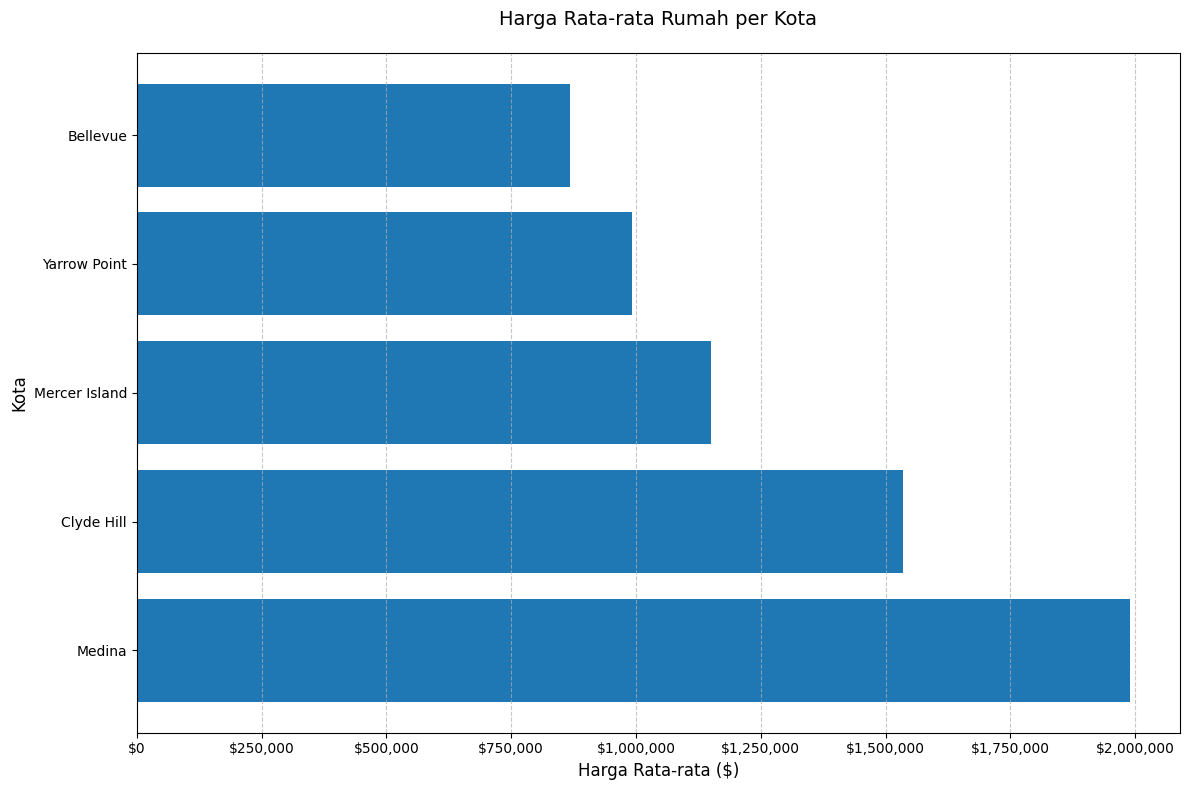

In [ ]:
# Mengelompokkan data berdasarkan kota dan menghitung harga rata-rata
city_prices = train.groupby('city')['price'].mean().sort_values(ascending=False)
city_prices = city_prices.head(5)

# Membuat plot horizontal
plt.figure(figsize=(12, 8))
plt.barh(city_prices.index, city_prices.values)

# Mengatur label dan judul
plt.title('Harga Rata-rata Rumah per Kota', fontsize=14, pad=20)
plt.xlabel('Harga Rata-rata ($)', fontsize=12)
plt.ylabel('Kota', fontsize=12)

# Menambahkan format dollar pada sumbu x
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Mengatur layout agar label tidak terpotong
plt.tight_layout()

# Menambahkan grid untuk memudahkan pembacaan
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

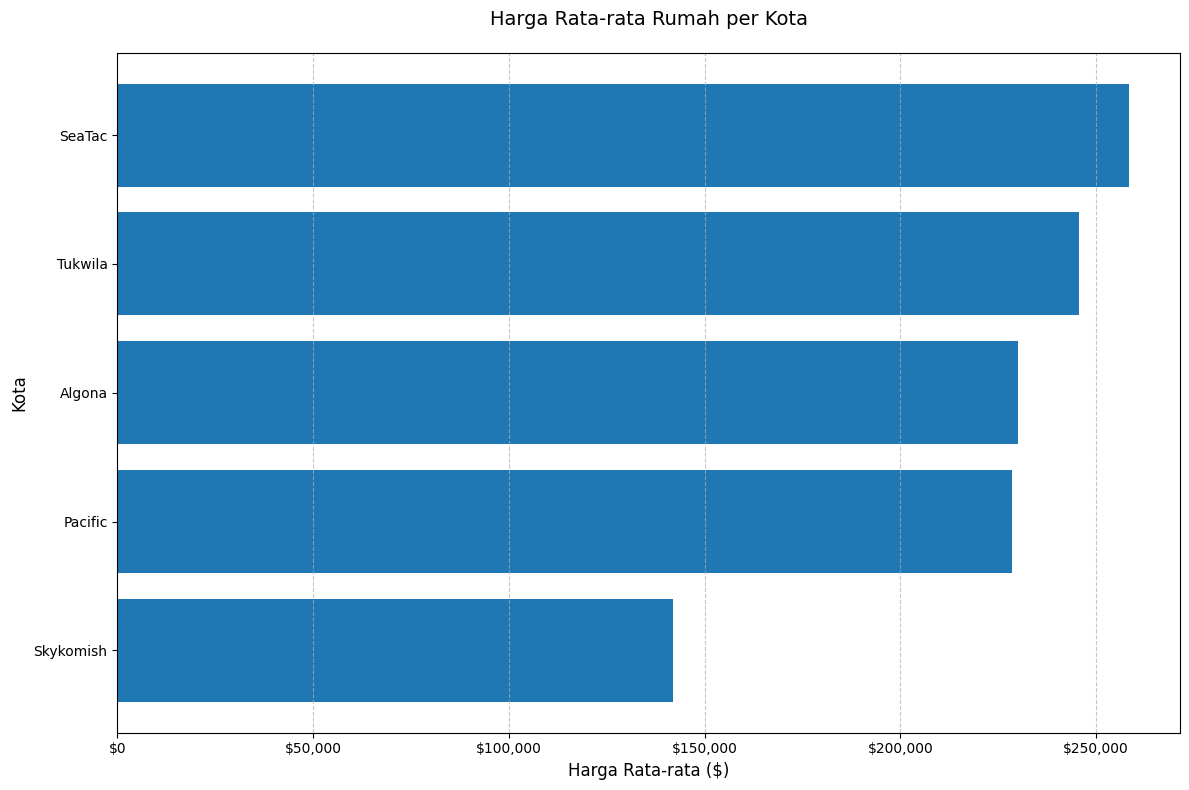

In [ ]:
# Mengelompokkan data berdasarkan kota dan menghitung harga rata-rata
city_prices = train.groupby('city')['price'].mean().sort_values(ascending=True)
city_prices = city_prices.head(5)

# Membuat plot horizontal
plt.figure(figsize=(12, 8))
plt.barh(city_prices.index, city_prices.values)

# Mengatur label dan judul
plt.title('Harga Rata-rata Rumah per Kota', fontsize=14, pad=20)
plt.xlabel('Harga Rata-rata ($)', fontsize=12)
plt.ylabel('Kota', fontsize=12)

# Menambahkan format dollar pada sumbu x
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Mengatur layout agar label tidak terpotong
plt.tight_layout()

# Menambahkan grid untuk memudahkan pembacaan
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

## 2.4 Verify Data Quality

In [ ]:
print("Jumlah Data yang hilang (train)")
print(train.isna().sum())
print("\nJumlah Data yang hilang (test)")
print(test.isna().sum())

Jumlah Data yang hilang (train)
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
price            0
dtype: int64

Jumlah Data yang hilang (test)
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
price            0
dtype: int64


In [ ]:
print("Jumlah Data yang duplikat (train)")
print(train.duplicated().sum())
print("\nJumlah Data yang duplikat (test)")
print(test.duplicated().sum())

Jumlah Data yang duplikat (train)
0

Jumlah Data yang duplikat (test)
0


In [ ]:
print(len(train[train['price']==0]))

34


In [ ]:
print(len(train[(train['bedrooms'] == 0) & (train['bathrooms'] == 0)]))

1


In [ ]:
print(len(train[train['sqft_living'] == 0]))

0


### 2.4.1 Data Quality Report

Setelah dilakukan pengamatan kualitas data, diketahui bahwa:

*   terdapat properti dengan harga 0 dolar sebanyak 34 baris. solusi: proses pembersihan data dengan membuang baris yang mengandung kriteria diatas
*   terdapat rumah dengan bedrooms dan bathrooms berjumlah 0 sebanyak 1 baris. solusi: proses pembersihan data dengan membuang baris yang mengandung kriteria diatas
*   Tidak terdapat data yang hilang
*   Tidak terdapat data yang duplikat



# 3. Data Preparation

## 3.1 Select Data (Train and Test)

membuang kolom non-numerik

In [ ]:
train.drop(columns = ['street','city','statezip'],inplace=True,axis=1)
test.drop(columns = ['street','city','statezip'],inplace=True,axis=1)

In [ ]:
train.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
bedrooms,1.000000,0.547010,0.606157,0.060981,0.192574,0.006695,0.114829,0.028362,0.492654,0.338841,0.138817,-0.067996,0.311311
bathrooms,0.547010,1.000000,0.766961,0.089906,0.479838,0.077357,0.219733,-0.130130,0.685731,0.313051,0.463639,-0.215869,0.496480
sqft_living,0.606157,0.766961,1.000000,0.177887,0.351915,0.126755,0.298687,-0.070468,0.875348,0.442921,0.294390,-0.117076,0.678391
sqft_lot,0.060981,0.089906,0.177887,1.000000,-0.001914,0.020700,0.033799,0.001349,0.182659,0.028823,0.047448,-0.010027,0.074446
floors,0.192574,0.479838,0.351915,-0.001914,1.000000,0.033982,0.039974,-0.272570,0.531665,-0.258790,0.458773,-0.233873,0.251900
waterfront,0.006695,0.077357,0.126755,0.020700,0.033982,1.000000,0.338805,-0.022699,0.094027,0.087532,-0.036196,0.036954,0.216520
view,0.114829,0.219733,0.298687,0.033799,0.039974,0.338805,1.000000,0.055086,0.173640,0.295134,-0.058603,0.028902,0.338288
condition,0.028362,-0.130130,-0.070468,0.001349,-0.272570,-0.022699,0.055086,1.000000,-0.181437,0.190851,-0.397450,-0.180795,0.040066
sqft_above,0.492654,0.685731,0.875348,0.182659,0.531665,0.094027,0.173640,-0.181437,1.000000,-0.045771,0.409230,-0.151735,0.578724
sqft_basement,0.338841,0.313051,0.442921,0.028823,-0.258790,0.087532,0.295134,0.190851,-0.045771,1.000000,-0.150610,0.039475,0.328482


kolom 'Floors', 'yr_renovated', 'waterfront', 'view' akan dibuang karena berkorelasi rendah dibawah 0.5 (Floors dengan price : 0.25 , yr_renovated dengan price : -0.03, waterfront dengan price : 0.21, view dengan price : 0.33) serta kolom tersebut tidak akan digunakan di bagian 'Feature Engineering'

In [ ]:
train.drop(['floors','yr_renovated','waterfront','view'],axis=1,inplace=True)
test.drop(['floors','yr_renovated','waterfront','view'],axis=1,inplace=True)

## 3.2 Clean Data

### 3.2.1 Data Cleaning Report

Properti dengan harga 0 (train dan test)

In [ ]:
train.drop(train[train['price']==0].index, inplace=True)
test.drop(test[test['price']==0].index, inplace=True)

Properti dengan bedrooms dan bathrooms berjumlah 0

In [ ]:
train.drop(train[train['bedrooms'] == 0].index, inplace=True)
test.drop(test[test['bedrooms'] == 0].index, inplace=True)

Membuang outlier sqft_lot

In [ ]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

## 3.3 Construct Data with Feature Engineering

In [ ]:
def ratio_bed_beth(area):
  return area['bedrooms'] / area['bathrooms']

train['ratio_bed_beth'] = train.apply(ratio_bed_beth, axis=1)
test['ratio_bed_beth'] = test.apply(ratio_bed_beth, axis=1)

In [ ]:
def ratio_lot_living(area):
  ratio = area['sqft_living'] / area['sqft_lot']
  return ratio

train['ratio_living_lot'] = train.apply(ratio_lot_living, axis=1)
test['ratio_living_lot'] = test.apply(ratio_lot_living, axis=1)

In [ ]:
def ratio_totalarea(area):
  ratio_totalarea = (area['sqft_living'] + area['sqft_lot']) / (area['sqft_above'] + area['sqft_basement'])
  return ratio_totalarea

train['ratio_totalarea'] = train.apply(ratio_totalarea,axis=1)
test['ratio_totalarea'] = test.apply(ratio_totalarea,axis=1)

In [ ]:
import datetime
from datetime import datetime

def age_house(age):
  year_now = datetime.now().year
  totalage = year_now - age
  return totalage

train['age_house'] = train['yr_built'].apply(age_house)
test['age_house'] = test['yr_built'].apply(age_house)

In [ ]:
train.drop(['sqft_basement','yr_built'],inplace=True,axis=1)
test.drop(['sqft_basement','yr_built'],inplace=True,axis=1)

## 3.4 Format Data

mengubah urutan kolom sehingga lebih mudah dibaca

In [ ]:
order = ['bedrooms','bathrooms','condition','sqft_living','sqft_lot','sqft_above','ratio_bed_beth','ratio_living_lot','ratio_totalarea','age_house','price']
train = train[order]
test = test[order]

## 3.5 Dataset

In [ ]:
train

,bedrooms,bathrooms,condition,sqft_living,sqft_lot,sqft_above,ratio_bed_beth,ratio_living_lot,ratio_totalarea,age_house,price
0,3,1.0,3,1330,15678,900,3.0,0.084832,12.787970,40,405000.000000
1,4,2.5,4,2700,9320,2700,1.6,0.289700,4.451852,30,837500.000000
2,2,1.0,4,790,8424,790,2.0,0.093780,11.663291,71,268500.000000
3,3,2.5,3,1800,2700,1800,1.2,0.666667,2.500000,13,365000.000000
4,4,2.5,3,2340,11784,2340,1.6,0.198574,6.035897,27,330000.000000
...,...,...,...,...,...,...,...,...,...,...,...
2904,3,1.0,3,1180,5002,1180,3.0,0.235906,5.238983,78,282508.888889
2905,4,2.0,3,2520,6000,1400,2.0,0.420000,3.380952,103,875000.000000
2906,3,1.0,4,1150,8145,990,3.0,0.141191,8.082609,92,290000.000000
2907,2,1.0,3,910,2002,910,2.0,0.454545,3.200000,124,600000.000000


In [ ]:
meta

,No,Column name,Description
0,1,bedrooms,Number of bedrooms
1,2,bathrooms,Number of bathrooms
2,3,sqft_living,House area
3,4,sqft_lot,Total area
4,5,floors,Number of floors
5,6,waterfront,Next to area of water (1 or 0)
6,7,view,View scale (1 - lowest to 5 – highest)
7,8,condition,Condition scale (1 - lowest to 5 – highest)
8,9,sqft_above,Total area for upper floors
9,10,sqft_basement,Total area for basement


# 4. Modeling

## 4.1 Modeling Technique

Beberapa algoritma yang digunakan yaitu Linear Regression besera algoritma ensemble learning (Random Forest, Adaboost, GradientBoost)

In [ ]:
# Single Model
from sklearn.linear_model import LinearRegression

#Ensemble Model
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

Metrik error yang digunakan dalam model regresi yaitu Root Mean Squared Error (RMSE)

In [ ]:
from sklearn.metrics import root_mean_squared_error as rmse

## 4.2 Generate Test Design

In [ ]:
X_train = train.drop('price', axis=1)
y_train = train['price']
X_test = test.drop('price', axis=1)
y_test = test['price']

## 4.3 Build Model

In [ ]:
rmserror = []
rmsetrain = []
models = [LinearRegression(), RandomForestRegressor(random_state=80
), AdaBoostRegressor(random_state=80
), GradientBoostingRegressor(random_state=80
), xgb.XGBRegressor(random_state=80
)]

for i in range(len(models)):
  model = models[i]
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  rmsetrain.append(rmse(y_train, y_pred_train))
  rmserror.append(rmse(y_test, y_pred))

data = {'Model' : ['Linear Regression','Random Forest', 'Adaboost','Gradient Boosting', 'XGBoost'], 'RMSE': rmserror, 'RMSE train': rmsetrain}
data = pd.DataFrame(data)

## 4.4 Assess Model

### 4.4.1 Model Assessment

Didapatkan hasil RMSE ke-5 model regresi, kemudian dipilih model dengan RMSE testing terkecil. XGBoost merupakan model dengan RMSE terkecil (226727)

In [ ]:
data

,Model,RMSE,RMSE train
0,Linear Regression,228596.006267,246255.287015
1,Random Forest,243937.112723,93708.159769
2,Adaboost,354166.116360,343065.387965
3,Gradient Boosting,229123.646045,178493.694029
4,XGBoost,226727.279248,63145.360344


### 4.4.2 Revised Parameter Settings

Hasil RMSE pada model XGBoost masih terlalu besar untuk harga properti, sehingga perlu dilakukan hyperparameter tuning untuk mendapatkan model dengan parameter terbaik

In [ ]:
pip install optuna

In [ ]:
import optuna

result = []

def objective(trial):
  regressor_name = trial.suggest_categorical('regressor', ['LinearRegression', 'RandomForestRegressor', 'AdaBoostRegressor',' GradientBoostingRegressor','xgb.XGBRegressor'])
  if regressor_name == 'LinearRegression':
    fit_intercept = trial.suggest_categorical('fit_intercept',[True, False])
    n_jobs = trial.suggest_int('n_jobs',-1,1)
    copy_X = trial.suggest_categorical('copy_X',[True, False])
    regressor_obj = LinearRegression(fit_intercept=fit_intercept, n_jobs=n_jobs, copy_X= copy_X)
  elif regressor_name == 'RandomForestRegressor':
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    random_state = trial.suggest_int('random_state', 1, 100)
    regressor_obj = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
  elif regressor_name == 'AdaBoostRegressor':
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0)
    random_state = trial.suggest_int('random_state', 1, 100)
    regressor_obj = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state)
  elif regressor_name == 'GradientBoostingRegressor':
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    tol = trial.suggest_float('tol', 0.0, 0.5)
    random_state = trial.suggest_int('random_state', 1, 100)
    regressor_obj = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, tol=tol, random_state=random_state)
  else:
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    random_state = trial.suggest_int('random_state', 1, 100)
    regressor_obj = xgb.XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=random_state)


  regressor_obj.fit(X_train, y_train)
  y_pred = regressor_obj.predict(X_test)
  error = rmse(y_test, y_pred)

  result.append({
      'regressor_name' : regressor_name,
      'RMSE' : error,
      'Parameters' : trial.params
  })

  return error

study = optuna.create_study()
study.optimize(objective, n_trials=500)


results = pd.DataFrame(result)

[I 2024-11-11 15:21:42,453] A new study created in memory with name: no-name-06fd5d11-546a-4276-a0ef-432e8c545a3a
[I 2024-11-11 15:21:43,508] Trial 0 finished with value: 274283.26809195464 and parameters: {'regressor': 'xgb.XGBRegressor', 'n_estimators': 250, 'learning_rate': 0.9278176772006013, 'max_depth': 8, 'random_state': 73}. Best is trial 0 with value: 274283.26809195464.
[I 2024-11-11 15:21:49,040] Trial 1 finished with value: 241681.71804416846 and parameters: {'regressor': 'RandomForestRegressor', 'n_estimators': 541, 'max_depth': 5, 'random_state': 28}. Best is trial 1 with value: 241681.71804416846.
[I 2024-11-11 15:21:49,774] Trial 2 finished with value: 562474.301381163 and parameters: {'regressor': 'AdaBoostRegressor', 'n_estimators': 475, 'learning_rate': 0.9182608150240439, 'random_state': 13}. Best is trial 1 with value: 241681.71804416846.
[I 2024-11-11 15:21:50,575] Trial 3 finished with value: 261373.79928690117 and parameters: {'regressor': 'xgb.XGBRegressor', 'n

In [ ]:
best_result = results.loc[results.groupby('regressor_name')['RMSE'].idxmin()]
best_result = best_result.sort_values(by='RMSE', ascending=True)
best_result

,regressor_name,RMSE,Parameters
355,GradientBoostingRegressor,213994.716079,"{'regressor': ' GradientBoostingRegressor', 'n..."
290,xgb.XGBRegressor,216232.126417,"{'regressor': 'xgb.XGBRegressor', 'n_estimator..."
8,LinearRegression,228596.006267,"{'regressor': 'LinearRegression', 'fit_interce..."
87,RandomForestRegressor,239224.634157,"{'regressor': 'RandomForestRegressor', 'n_esti..."
467,AdaBoostRegressor,247059.652323,"{'regressor': 'AdaBoostRegressor', 'n_estimato..."


Model terbaik yaitu XGBoost dengan RMSE sebesar 216232. Alasan mengapa tidak Gradient Boosting yang memiliki RMSE lebih rendah dikarenakan RMSE data training pada XGBoost lebih rendah dibandingkan RMSE training pada Gradient Boosting.

In [ ]:
best_model = xgb.XGBRegressor(n_estimators=114,
                                       learning_rate=0.10884285935504656, max_depth=3, random_state=84)

best_model = best_model.fit(X_train, y_train)

# 5. Evaluation

## 5.1 Evaluate results

Berdasarkan bisnis objektif yang diharapkan, model prediksi harga rumah sudah cukup sesuai dengan catatan terdapat sedikit perbedaan harga prediksi dengan actual pada data tersebut.

Untuk rekomendasi projek kedepannya, diharapkan untuk mengexplore data harga properti lebih jauh lagi sehingga dapat menemukan sesuatu yang baru lebih banyak dari saat ini. Selain itu, pengolahan kolom untuk feature engineering jika bisa diexplore lebih jauh lagi, diharapkan performa model akan semakin baik dengan menurunnya RMSE.

Model prediksi yang sesuai dengan business criteria adalah XGBoost dilihat dari nilai RMSE yang dihasilkan paling kecil dibandingkan model yang lainnya.

## 5.2 Review Process

* Summary process

  Pada tahap ini, dilakukan langkah eksplorasi sampai modeling untuk memberikan gambaran awal terkait pola data serta menentukan keefektifan model.
* Analisis distribusi data

  Dilakukan analisis distribusi untuk mengidentifikasi pola, sebaran serta anomali dalam data (contoh: $0). Grafik histogram dan box plot digunakan untuk mengi valuasi distribusi setiap fitur baik numerik maupun kategorikal.
* Pengecekan missing value

  Pada tahap ini dilakukan identifikasi kekosongan value dataset serta menentukan metode penanganannya seperti inputation atau penghapusan baris dan kolom untuk meminimalkan dampak terhadap pembangunan model.
* Deteksi outlier

  Tahap ini dilakukan untuk menemukan outlier yang kemungkinan dapat mempengaruhi performa model. Jika outlier tidak relevan dilakukan penanganan sesuai strategi yang sesuai.
* Analisis korealasi fitur

  Mengevaluasi korelasi antara fitur target serta antar fitur menggunakan korelasi Pearson dan spearman (untuk menghindari multi kolineritas yang bisa mempengaruhi akurasi prediksi).
* Pemodelan

  Model dibangun menggunakan regresi linear dan model gabungan atau ensemble yaitu random forest, gradien boosting dan xgboost. Dengan hasil pengujian model terbaik didapatkan oleh xgboost untuk prediksi harga properti dengan rmse terendah 226727,27.

## 5.3 Determine Next Steps

Agar model dapat digunakan oleh perusahaan untuk memprediksi harga properti, maka model regresi dapat disimpan untuk digunakan dalam bentuk web menggunakan framework python seperti flask maupun django.

In [ ]:
import pickle

with open('best_model.pkl', 'wb') as f:
  pickle.dump(best_model, f)

from google.colab import files
files.download('best_model.pkl')